In [1]:
##installs pytorch on a cuda-capable windows machine using pip

%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

%pip install torchsummary

%pip install numpy

%pip install matplotlib

%pip install opencv-python

%pip install scikit-learn

%pip install pandas

%pip install tqdm

%pip install pickle5

%pip install git+https://github.com/albumentations-team/albumentations

Looking in indexes: https://download.pytorch.org/whl/cu118Note: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\pickle.py -> build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-312\pickle5
      copying pickle5\__init__.py -> build\lib.win-amd64-cpython-312\pickle5
      creating build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-312\pickle5\test
      copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-312\pickle5\test
      run

  Cloning https://github.com/albumentations-team/albumentations to c:\users\admin\appdata\local\temp\pip-req-build-zs4bpyoq
  Resolved https://github.com/albumentations-team/albumentations to commit 0cac227d9a8f2ae7f3c0fdfd81e123208b38e924
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for albumentations: filename=albumentations-2.0.2-py3-none-any.whl size=283285 sha256=ac810d8ef30317722dcc46c6c20e91c9d8a5064deb7102886077d821651ae104
  Stored in directory: C:\Users\Admin\AppData\Local\Temp\pip-ephem-wheel-cache-daa82ay2\wheels\c5\43\65\96f74b58b1b29c6c1a3eb012744b9efc61c76f0cfd212b3e01
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: al

  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations 'C:\Users\Admin\AppData\Local\Temp\pip-req-build-zs4bpyoq'

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import random

In [2]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [3]:
from torchvision import models
from torchvision import transforms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
target_dir="plain-augmentation"

In [5]:
if(os.path.split(os.getcwd())[1] == target_dir):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

cuda = False

Current Working Directory: progettoVIPM


In [6]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset

In [7]:
from utils.extractNeuralFeatures import extract_features

In [8]:
chosen_net = networks.ALEXNET
print("Original classification layers:{}".format(chosen_net.value[1].classifier[:]))

Original classification layers:Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [9]:
random.seed(42)
train_transform = A.Compose(
    [
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128, p=0.5),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),        
        A.RandomToneCurve(scale=0.7, p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),#as required by All pre-trained models of torch
        ToTensorV2(),
    ]
)


In [10]:
# t sta per "tensor", ovvero il vettore sulla gpu, mentre "n" sta per "numpy", ovvero il vettore sulla cpu

linear_layers_to_remove = 3
X_train_ale_t, X_train_ale_n, y_train, X_test_ale_t, X_test_ale_n, y_test, fine_tune_layers = extract_features(target_dir="Storage", train_set=datasets.TRAINING_LABELED,
                                                                                            test_set=datasets.TEST,
                                                                                            network=chosen_net,
                                                                                            layers_to_remove=linear_layers_to_remove, cuda=cuda, transform=train_transform)
print("Original classification layers:{}".format(chosen_net.value[1].classifier[:]))
print("---------------------------------------------------------------------------------")
print("Classification layers to fine tune:{}".format(fine_tune_layers[:]))

---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Train: 5020
Feature vector shape of Train: (5020, 9216)
Label vector shape of Train: (5020,)
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Test: 11994
Feature vector shape of Test: (11994, 9216)
Label vector shape of Test: (11994,)
---------------------------------------------------------------------------------
Original classification layers:Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)
-------------------------------------

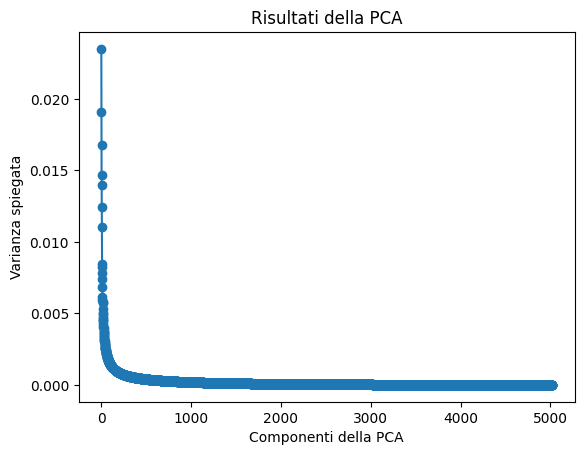

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

is_pca_used = False

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_ale_n)
pca = PCA().fit(scaled_data)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()


In [12]:

from torch.utils.data import DataLoader
from copy import deepcopy

fine_tune_layers[-1].out_features = 251
print(fine_tune_layers[:])
model = deepcopy(fine_tune_layers)

loss_function = torch.nn.CrossEntropyLoss()
if (cuda):
    y_test = torch.tensor(y_test).type(torch.LongTensor).cuda()
else:
    y_test = torch.tensor(y_test).type(torch.LongTensor)
    X_test_ale_t = torch.from_numpy(X_test_ale_n).float()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

test_loader = DataLoader(torch.utils.data.TensorDataset(X_test_ale_t, y_test), batch_size=1, shuffle=False)



Sequential(
  (0): Linear(in_features=9216, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Linear(in_features=4096, out_features=251, bias=True)
)


In [13]:
def train_one_epoch(epoch_index, tb_writer, training_loader, model, loss_function, optimizer):
    running_loss = 0.
    avg_batch_loss = 0.
    n_batch = 0

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_function(outputs, labels)
        avg_batch_loss += loss.item()
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        # Gather data and report
        # running_loss += loss.item()
        # if i % 10 == 9:
        #     last_loss = running_loss / 10 # loss per batch
        #     print('  batch {} loss: {}'.format(i + 1, last_loss))
        #     tb_x = epoch_index * len(training_loader) + i + 1
        #     tb_writer.add_scalar('Loss/train', last_loss, tb_x)
        #     running_loss = 0.
        n_batch += 1

    return avg_batch_loss/n_batch

In [14]:
from datetime import datetime
from tensorboardX import SummaryWriter
from IPython.display import clear_output

def train_model(n_epochs, model, loss_function, optimizer):
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
    epoch_number = 0 
    best_vloss = 1_000_000.
    losses = np.empty((n_epochs,2))

    for epoch in range(n_epochs):
        clear_output(wait=True)
        print('EPOCH {}:'.format(epoch_number + 1))

        # Make sure gradient tracking is on, and do a pass over the data
        model.train(True)


        ###### construct a new training_loader and validation_loader from the original non-modified data; this is necessary because using the same loaders in different epochs means using the same images, not creating new versions of the originals
        linear_layers_to_remove = 3
        X_train_ale_t, X_train_ale_n, y_train, X_test_ale_t, X_test_ale_n, y_test, fine_tune_layers = extract_features(target_dir="plain-augmentation", train_set=datasets.TRAINING_LABELED,
                                                                                                    test_set=datasets.TEST,
                                                                                                    network=chosen_net,
                                                                                                    layers_to_remove=linear_layers_to_remove, cuda=cuda, transform=train_transform)
        if (cuda):
            y_train = torch.tensor(y_train).type(torch.LongTensor).cuda()
            y_test = torch.tensor(y_test).type(torch.LongTensor).cuda()
        else:
            y_train = torch.tensor(y_train).type(torch.LongTensor)
            y_test = torch.tensor(y_test).type(torch.LongTensor)
            X_train_ale_t = torch.from_numpy(X_train_ale_n).float()

        optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
        dataset_train = torch.utils.data.TensorDataset(X_train_ale_t, y_train)
        train_dataset, val_dataset = torch.utils.data.random_split(dataset_train, [0.9, 0.1])
        training_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
        validation_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
        ######
        avg_loss = train_one_epoch(epoch_number, writer, training_loader, model, loss_function, optimizer)


        running_vloss = 0.0
        # Set the model to evaluation mode, disabling dropout and using population
        # statistics for batch normalization.
        model.eval()

        # Disable gradient computation and reduce memory consumption.
        with torch.no_grad():
            for i, vdata in enumerate(validation_loader):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = loss_function(voutputs, vlabels)
                running_vloss += vloss.item()

        avg_vloss = running_vloss / (i + 1)
        losses[epoch_number] = [avg_loss, avg_vloss]
        print('LOSS: train {}; valid {}'.format(avg_loss, avg_vloss))

        # Log the running loss averaged per batch
        # for both training and validation
        writer.add_scalars('Training vs. Validation Loss',
                        { 'Training' : avg_loss, 'Validation' : avg_vloss },
                        epoch_number + 1)
        writer.flush()

        # Track best performance, and save the model's state
        # if avg_vloss < best_vloss:
        #     best_vloss = avg_vloss
        #     model_path = './Transfer_Learning/models/neural/model_{}_{}'.format(timestamp, epoch_number)
        #     torch.save(model.state_dict(), model_path)

        epoch_number += 1
    return model, losses

In [15]:

trained_model, losses = train_model(n_epochs=100, 
                                    model=model, loss_function=loss_function, optimizer=optimizer)

EPOCH 100:
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Train: 5020
Feature vector shape of Train: (5020, 9216)
Label vector shape of Train: (5020,)
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Done feat extraction, total n° of istances in Test: 11994
Feature vector shape of Test: (11994, 9216)
Label vector shape of Test: (11994,)
---------------------------------------------------------------------------------
LOSS: train 5.545663754145305; valid 5.574054479598999


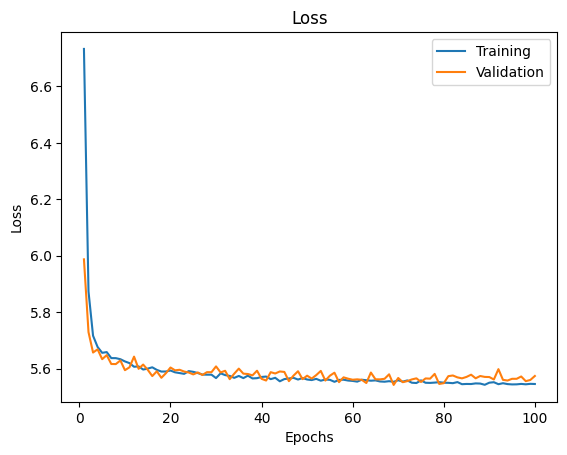

In [16]:
def plot_loss(history):
  x_plot = list(range(1,len(history)+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history[:,0])
  plt.plot(x_plot, history[:,1])
  plt.legend(['Training', 'Validation'])

# print(losses)
plot_loss(losses)

In [19]:
trained_model.eval()

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
predictions = np.zeros(len(test_loader))
# Disable gradient computation and reduce memory consumption.
with torch.no_grad():
    i = 0
    for test_data in tqdm(test_loader):
        test_features, test_labels = test_data
        predictions[i] = np.argmax(np.array(trained_model(test_features).cpu()))
        i+=1
y_test = np.array(y_test.cpu())
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}".format(accuracy))
        

Accuracy: 0.003501750875437719
